<a href="https://colab.research.google.com/github/sanchitjain04/EIP-session-1/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import tensorflow as tf


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


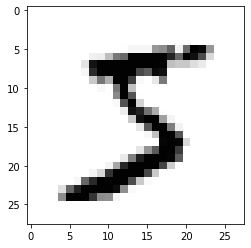

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='Greys')


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


In [0]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers


In [0]:
from keras.layers import Activation
model = Sequential()


model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = 'softmax'))




In [73]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 3, 64)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [78]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3488 - acc: 0.8897
Epoch 2/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1240 - acc: 0.9630
Epoch 3/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0992 - acc: 0.9710
Epoch 4/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0849 - acc: 0.9748
Epoch 5/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0765 - acc: 0.9775
Epoch 6/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0691 - acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0673 - acc: 0.9804
Epoch 8/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0641 - acc: 0.9812
Epoch 9/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0613 - acc: 0.9816
Epoch 10/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0607 - acc: 0.9820

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [80]:
print(score)

[0.023898320514891748, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [82]:
print(y_pred[:9])
print(y_test[:9])

[[2.23987545e-21 5.79728756e-13 6.78103268e-11 1.02455495e-10
  1.24277689e-11 3.04721458e-14 3.81783662e-22 1.00000000e+00
  5.42479202e-14 2.71412492e-09]
 [4.09837247e-10 1.27968782e-08 1.00000000e+00 2.71735701e-09
  3.61395969e-10 4.87237312e-13 1.38981147e-08 4.43127653e-11
  4.45089687e-10 8.06472250e-12]
 [2.06945832e-16 1.00000000e+00 3.04480226e-11 3.23491835e-15
  4.78447837e-10 3.42593510e-12 4.81776945e-12 1.05996345e-09
  1.61251323e-09 3.94920126e-13]
 [9.99999523e-01 7.71229868e-14 1.88980373e-10 1.37108980e-09
  2.54215381e-11 5.78246819e-08 2.25907300e-07 1.98880530e-11
  1.22063838e-07 1.48035554e-07]
 [4.91059016e-13 1.48081634e-12 3.28222050e-09 1.71626317e-13
  9.99983311e-01 3.70090980e-12 2.64263417e-10 2.23524665e-09
  1.76011383e-08 1.66218942e-05]
 [5.18557753e-16 1.00000000e+00 3.31366080e-11 6.52474773e-16
  6.82229051e-10 7.72732518e-13 2.58986192e-12 1.91031746e-09
  1.07372289e-09 3.57529951e-13]
 [1.53844328e-15 2.77252821e-09 3.10951570e-10 5.81249551e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored